In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Task 1 #
from sklearn import datasets
wine = datasets.load_wine()

#### Task 1:
##### Having imported the wine data, write below Python code to display the following data descriptors:
        a) number of rows vs. number of columns, excluding the target variable
        b) the labels of the columns, i.e., attributes of data
        c) the target variable values and their meaning
        

In [3]:
from sklearn import datasets

# Load the wine dataset
wine = datasets.load_wine()

# a) Number of rows vs. number of columns, excluding the target variable
num_rows, num_cols = wine.data.shape
print("Number of Rows:", num_rows)
print("Number of Columns (excluding target variable):", num_cols)

# b) Labels of the columns (attributes of data)
print("\nLabels of Columns (Attributes of Data):")
print(wine.feature_names)

# c) Target variable values and their meaning
print("\nTarget Variable Values and Their Meaning:")
print("Target Variable Name:", wine.target_names)
print("Target Variable Values:", set(wine.target))


Number of Rows: 178
Number of Columns (excluding target variable): 13

Labels of Columns (Attributes of Data):
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Variable Values and Their Meaning:
Target Variable Name: ['class_0' 'class_1' 'class_2']
Target Variable Values: {0, 1, 2}


#### Task 2:
##### Write code to create boxplots as summaries of the basic statistical descriptors. The displayed boxplots, however, shall provide a way for meaningful comparisons among statistical descriptors of the data, which is not possible with the original data.

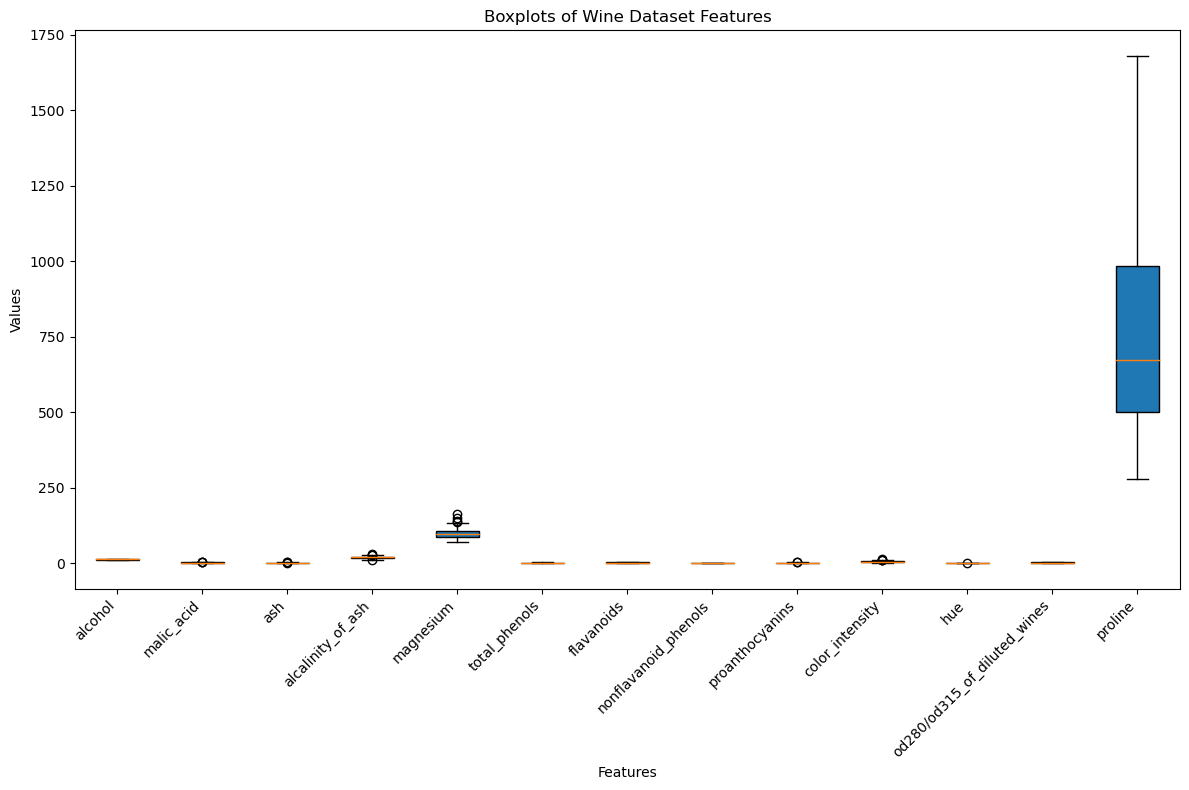

In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the wine dataset
wine = datasets.load_wine()

# Extract data and feature names
data = wine.data
feature_names = wine.feature_names

# Plot boxplots for each feature
plt.figure(figsize=(12, 8))
plt.boxplot(data, patch_artist=True)
plt.xticks(range(1, len(feature_names) + 1), feature_names, rotation=45, ha='right')
plt.title('Boxplots of Wine Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.datasets import load_wine
data, target = load_wine(return_X_y = True)


from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(data)

#### Task 3:
##### Write code to apply PCA to the imported wine data. In particular, you should display 
        a) the eigenvalues in descending order
        b) the percentages of variance being explained in descending order as well
        c) the plot of the relation between principal components and explained variance percentages
        d) the number of principal components needed to explain 80% of the variance
        e) the target classes of the wine data projected on the two first principal components

Eigenvalues in descending order:
[0.10396199 0.16972374 0.22706428 0.25232001 0.29051203 0.35046627
 0.55414147 0.64528221 0.85804868 0.92416587 1.45424187 2.51108093
 4.73243698]

Percentages of Variance Explained in descending order:
[0.00795215 0.01298233 0.01736836 0.01930019 0.02222153 0.02680749
 0.04238679 0.04935823 0.06563294 0.0706903  0.11123631 0.1920749
 0.36198848]


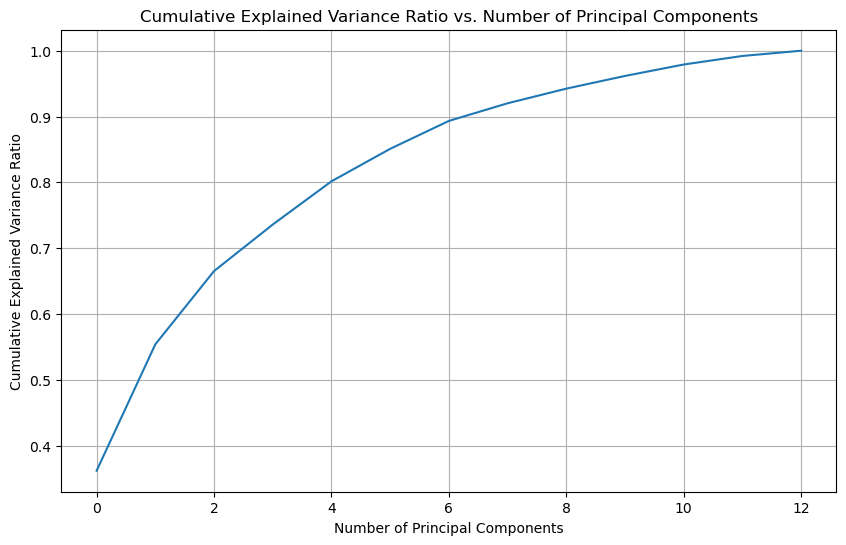


Number of Principal Components needed to explain 80% of the variance: 5


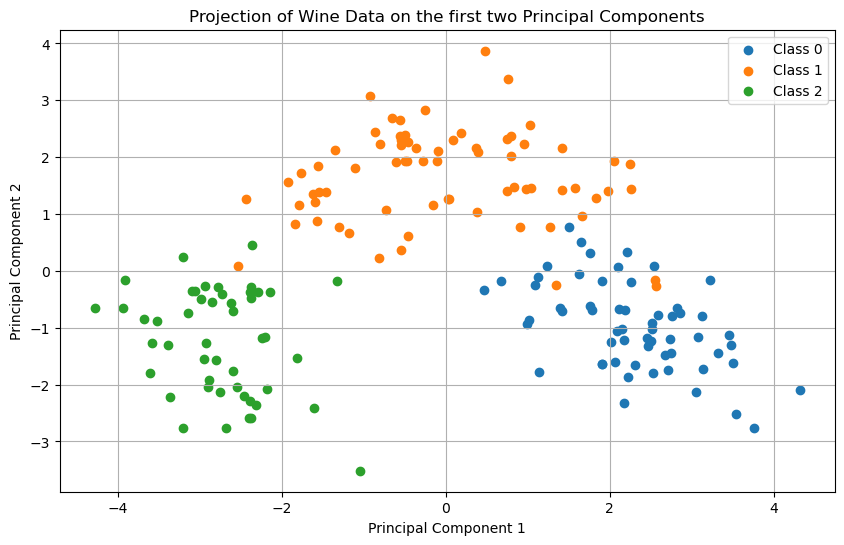

In [10]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the wine dataset
data, target = load_wine(return_X_y=True)

# Standardize the features
x = StandardScaler().fit_transform(data)

# Apply PCA
pca = PCA()
x_pca = pca.fit_transform(x)

# a) Eigenvalues in descending order
eigenvalues_descending = pca.explained_variance_[::-1]
print("Eigenvalues in descending order:")
print(eigenvalues_descending)

# b) Percentages of variance being explained in descending order
explained_variance_ratio_descending = pca.explained_variance_ratio_[::-1]
print("\nPercentages of Variance Explained in descending order:")
print(explained_variance_ratio_descending)

# c) Plot of the relation between principal components and explained variance percentages
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()

# d) Number of principal components needed to explain 80% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print("\nNumber of Principal Components needed to explain 80% of the variance:", num_components_80)

# e) Target classes of the wine data projected on the two first principal components
plt.figure(figsize=(10, 6))
for label in np.unique(target):
    plt.scatter(x_pca[target == label, 0], x_pca[target == label, 1], label=f"Class {label}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Wine Data on the first two Principal Components')
plt.legend()
plt.grid()
plt.show()
